<a href="https://colab.research.google.com/github/charan-debug/MDSC-102-Infrential-Statistics/blob/main/Normalizing_Data_of_Wine_dataset_and_Inferences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.special import boxcox
from scipy import stats

In [2]:
dataset = pd.read_csv(r"wine.data")
dataset.columns=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline' ]
df = dataset.copy()
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.info()
#float continuous rv
#integer means its descrete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [4]:
df.shape

(177, 14)

In [5]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Choose a column:
1: Alcohol
2: Malic acid
3: Ash
4: Alcalinity of ash
5: Magnesium
6: Total phenols
7: Flavanoids
8: Nonflavanoid phenols
9: Proanthocyanins
10: Color intensity
11: Hue
12: OD280/OD315 of diluted wines
13: Proline
Enter the number of the column: 1


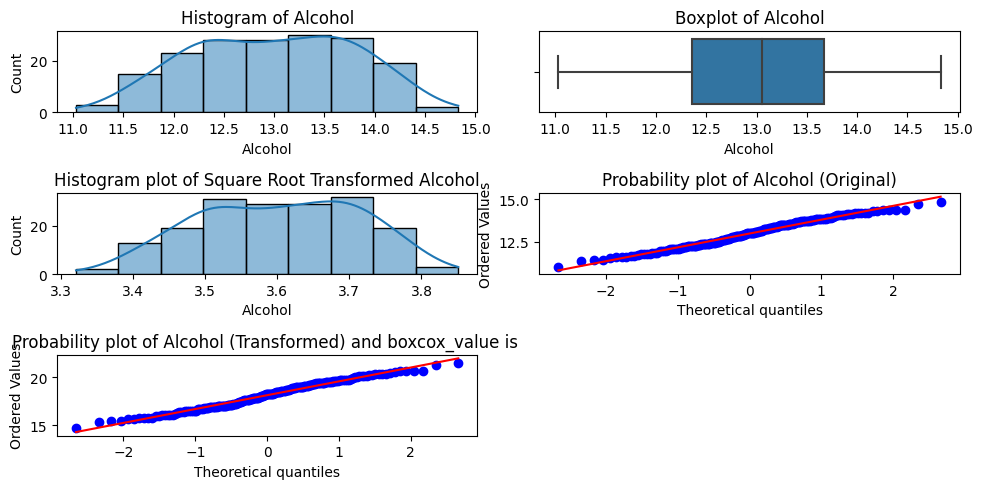

In [22]:
def transform_and_plot(df, column_name):
    plt.figure(figsize=(10,5))

    # Original Histogram and Boxplot
    plt.subplot(3, 2, 1)
    sns.histplot(x=df[column_name], kde=True)
    plt.title(f'Histogram of {column_name}')

    plt.subplot(3, 2, 2)
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name}')

    # Transformations
    sq_root = np.sqrt(df[column_name])
    ln = np.log(df[column_name])
    by = 1/(df[column_name])
    x = df[column_name]
    arr, lamb = sp.stats.boxcox(x)
    boxcox = (df[column_name]**lamb-1)/lamb
    boxcox_value=boxcox.skew()

    # Histogram of Transformed Data
    plt.subplot(3, 2, 3)
    sns.histplot(x=sq_root, kde=True, data=df)
    plt.title(f'Histogram plot of Square Root Transformed {column_name}')

    # Original Probability Plot
    plt.subplot(3, 2, 4)
    stats.probplot(x, plot=plt)
    plt.title(f"Probability plot of {column_name} (Original)")

    #  Probability Plot of Transformed Data
    plt.subplot(3,2,5)
    stats.probplot(boxcox, plot=plt)
    plt.title(f"Probability plot of {column_name} (Transformed) and boxcox_value is ")

    plt.tight_layout()
    plt.show()

# List of column names (excluding 'Magnesium')
column_names = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                'Total phenols','Flavanoids', 'Nonflavanoid phenols',
                'Proanthocyanins','Color intensity','Hue',
                'OD280/OD315 of diluted wines','Proline']

# Take user input for the desired column
print("Choose a column:")
for idx, column_name in enumerate(column_names, start=1):
    print(f"{idx}: {column_name}")

choice = int(input("Enter the number of the column: ")) - 1
if choice >= 0 and choice < len(column_names):
    selected_column = column_names[choice]
    transform_and_plot(df, selected_column)
else:
    print("Invalid choice.")

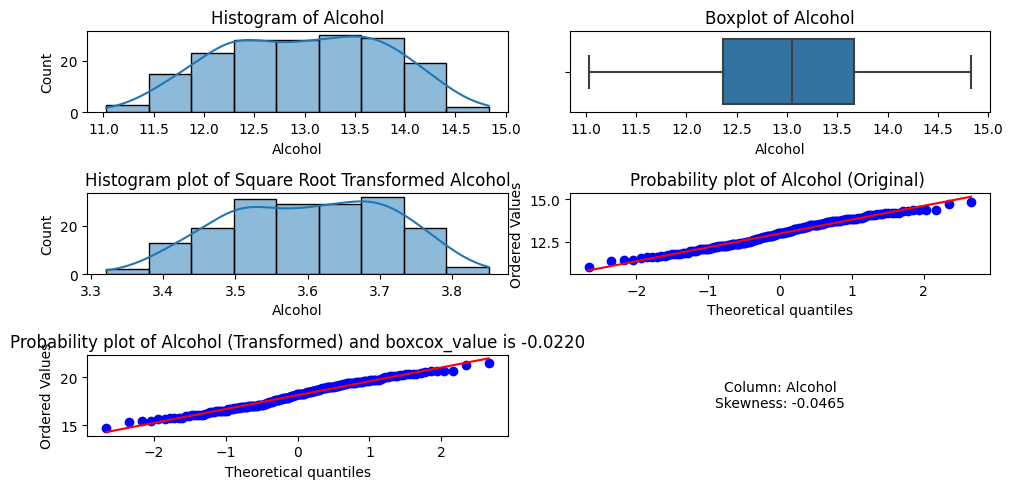

----------------------------------------------------------


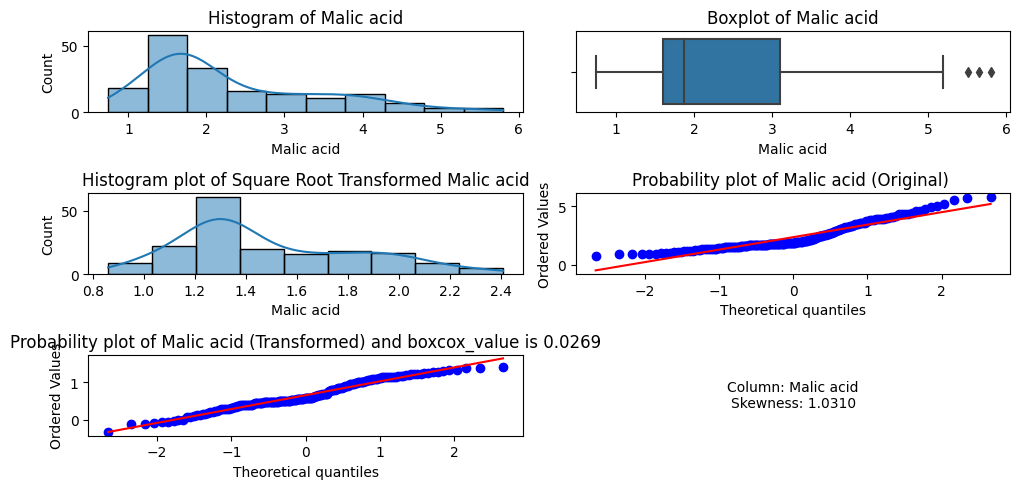

----------------------------------------------------------


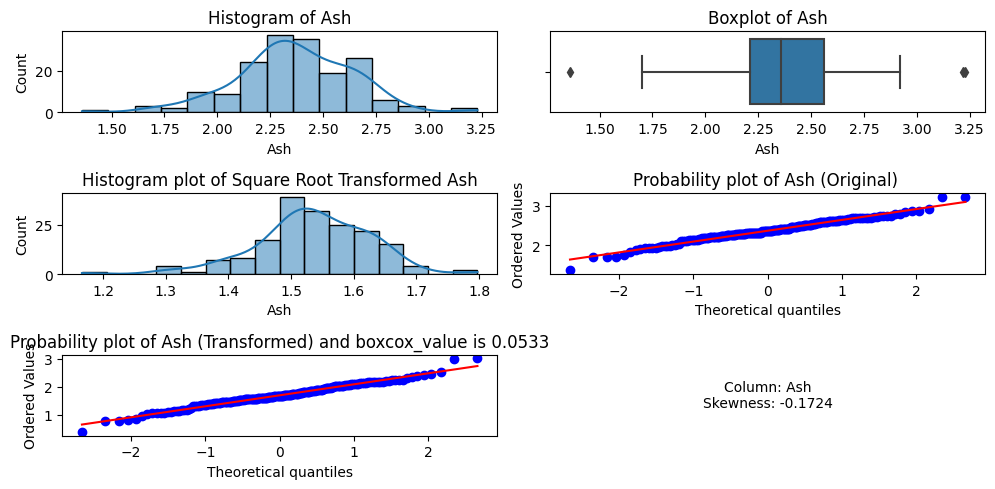

----------------------------------------------------------


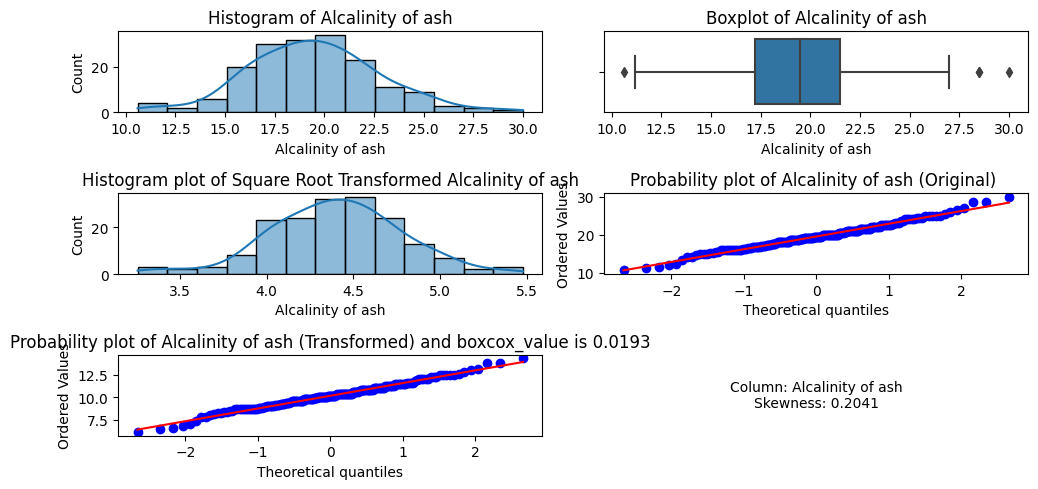

----------------------------------------------------------


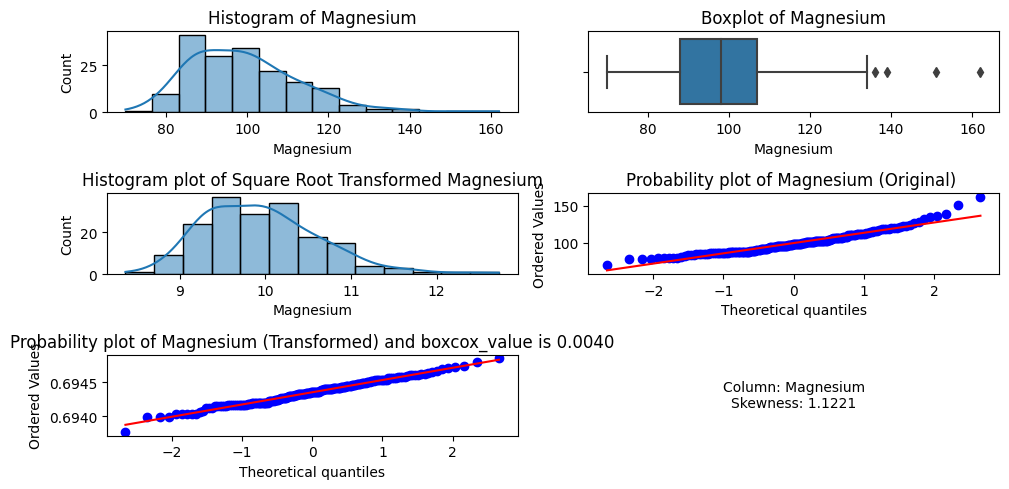

----------------------------------------------------------


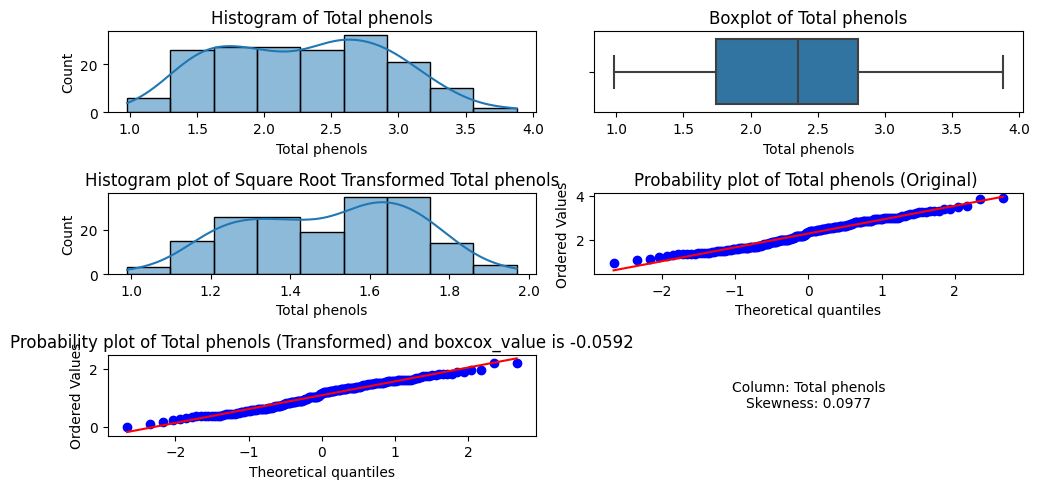

----------------------------------------------------------


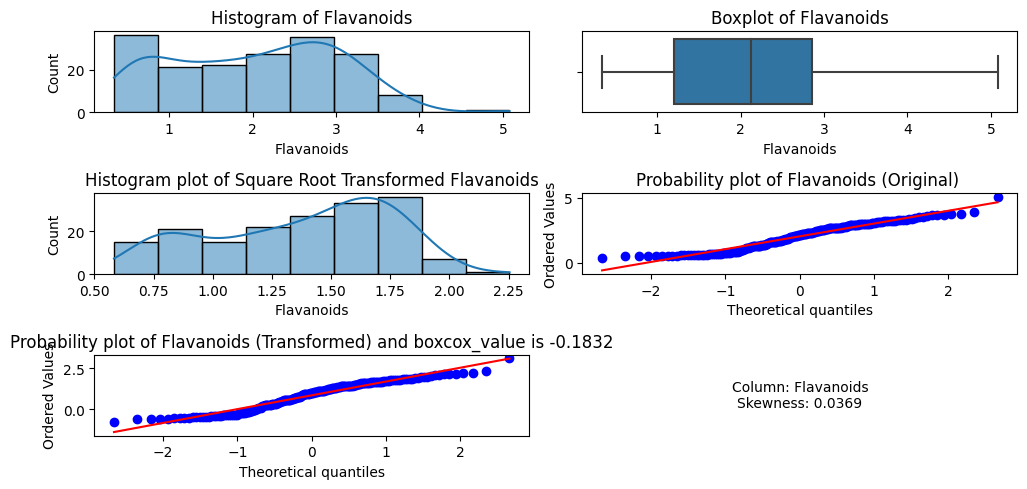

----------------------------------------------------------


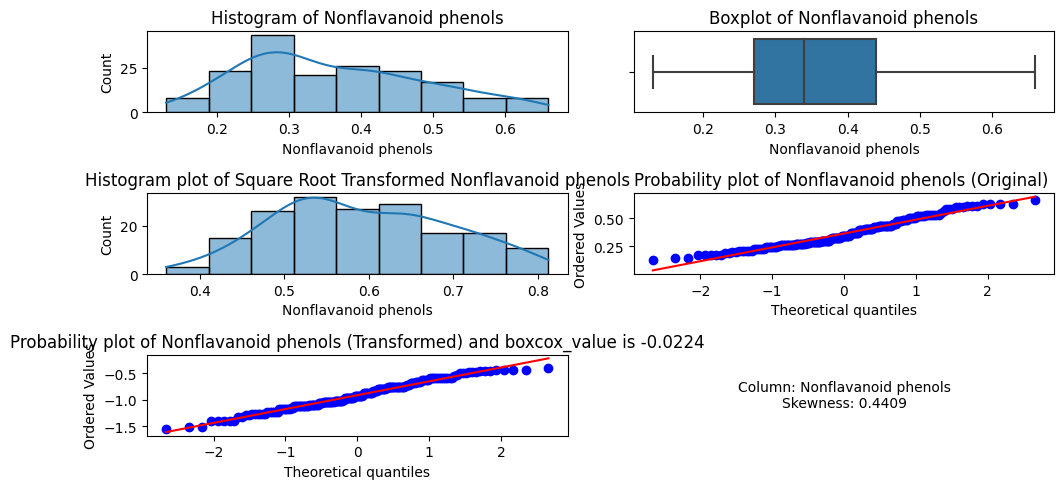

----------------------------------------------------------


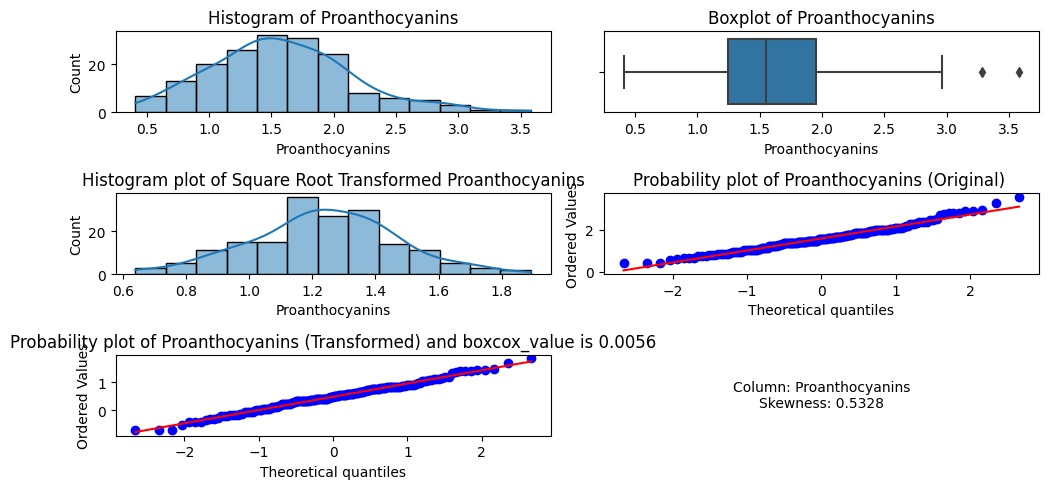

----------------------------------------------------------


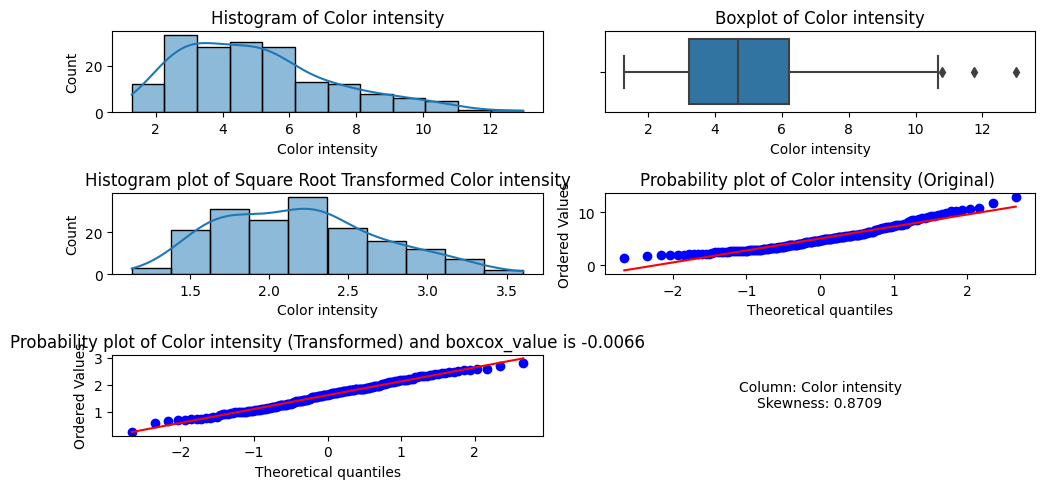

----------------------------------------------------------


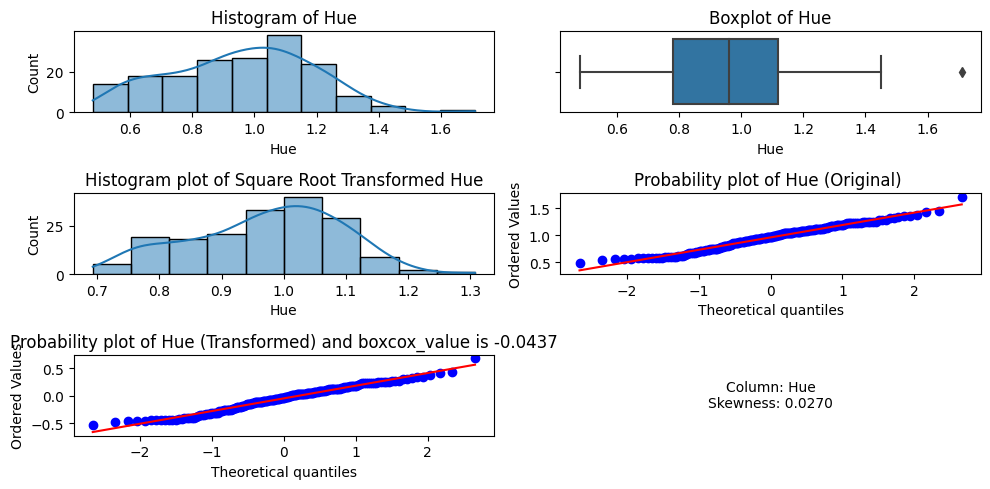

----------------------------------------------------------


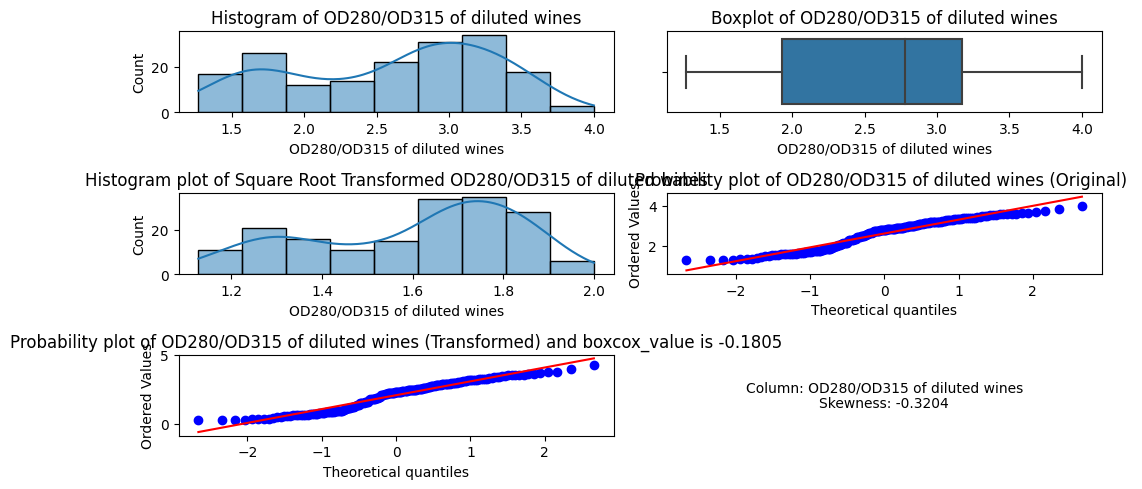

----------------------------------------------------------


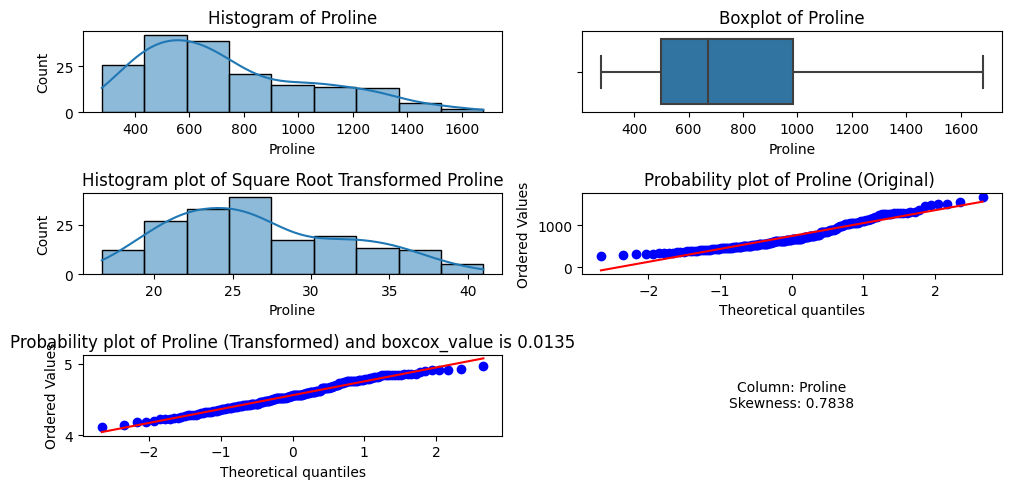

----------------------------------------------------------


In [34]:
def transform_and_plot(df, column_name):
    plt.figure(figsize=(10, 5))

    # Original Histogram and Boxplot
    plt.subplot(3, 2, 1)
    sns.histplot(x=df[column_name], kde=True)
    plt.title(f'Histogram of {column_name}')

    plt.subplot(3, 2, 2)
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name}')

    # Transformations
    sq_root = np.sqrt(df[column_name])
    ln = np.log(df[column_name])
    by = 1/(df[column_name])
    x = df[column_name]
    arr, lamb = sp.stats.boxcox(x)
    boxcox = (df[column_name]**lamb-1)/lamb
    boxcox_value = boxcox.skew()
    skewness = df[column_name].skew()

    # Histogram of Transformed Data
    plt.subplot(3, 2, 3)
    sns.histplot(x=sq_root, kde=True, data=df)
    plt.title(f'Histogram plot of Square Root Transformed {column_name}')

    # Original Probability Plot
    plt.subplot(3, 2, 4)
    stats.probplot(x, plot=plt)
    plt.title(f"Probability plot of {column_name} (Original) ")

    # Probability Plot of Transformed Data
    plt.subplot(3, 2, 5)
    stats.probplot(boxcox, plot=plt)
    plt.title(f"Probability plot of {column_name} (Transformed) and boxcox_value is {boxcox_value:.4f}")

    plt.subplot(3, 2, 6)
    plt.text(0.5, 0.5, f'Column: {column_name}\nSkewness: {skewness:.4f}', ha='center', va='center', transform=plt.gca().transAxes)
    plt.axis('off')  # Turn off axes for this subplot

    plt.tight_layout()
    plt.show()


column_names = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                'Total phenols','Flavanoids', 'Nonflavanoid phenols',
                'Proanthocyanins','Color intensity','Hue',
                'OD280/OD315 of diluted wines','Proline']

for column_name in column_names:
    transform_and_plot(df, column_name)
    print("----------------------------------------------------------")


**Alcohol**

---


The data is normally distributed, and the skewness is -0.04.

There are no outliers in box plot.

The box cox value after normalizing the data is  -0.02.

**Malic Acid**

---

The data is right skewed and the skewness is 1.03.

There are 3 outliers in box plot towards the right and is right skewed.

The box cox value after normalizing the data is  -0.02.

**Ash**

---

The data is normally distributed and the skewness is -0.17.

There are 2 outliers on the either side of the box plot.

The box cox value after normalizing the data is 0.053.

**Alcalinity of ash**

---


The data is normally distributed, and the skewness is 0.20.

There are 2 outliers on the right side and 1 at the left side of the box plot .

The box cox value after normalizing the data is 0.019.



**Magnesium**

---

The data is right skewed and the skewness is 1.12.

There are 4 outliers in box plot towards the right and is right skewed.

The box cox value after normalizing the data is  0.004.


**Total phenols**

---

The data is normally distributed, and the skewness is 0.0977.

There are no outliers but the  box plot is slightly skewed to the right .

The box cox value after normalizing the data is -0.0592.


**Flavanoids**

---

The data seems to be  normally distributed, and the skewness is 0.03.

There are no outliers but the  box plot is slightly skewed to the right .

The box cox value after normalizing the data is  -0.1832 and the bar distribution seems to be slightly skewed to the left after transformation.


**Nonflavanoid phenol**

---


The data is slightly skewed to the right distributed, and the skewness is 0.4409.

There are no outliers but the  box plot is slightly skewed to the right .

The box cox value after normalizing the data is -0.0224.

**Proanthocyanins**

---

The data is slightly skewed to the right distributed, and the skewness is 0.
5328.

There are 2 outliers and the   box plot is slightly skewed to the right .

The box cox value after normalizing the data is 0.0056.

**Color intensity**

---

The data is skewed to the right distributed, and the skewness is 0.8709.

There are 3 outliers and the   box plot is skewed to the right .

The box cox value after normalizing the data is -0.0066.

**Hue**

---

The data is normally distributed, and the skewness is 0.027.

There is 1 outliers and the   box plot is skewed to the right .

The box cox value after normalizing the data is -0.0437.

               
**OD280/OD315 of diluted wines**

---

The data is normally distributed, and the skewness is - 0.3204.

There are no outliers and the   box plot is normal.

The box cox value after normalizing the data is -0.1805.

**Proline**

---

The data is skewed to the right and the skewness is 0.7838.

There are no outliers and the   box plot is skewed to the right .

The box cox value after normalizing the data is 0.0135.





